# This notebook reproduces the slit interference simulations in Figures 2 and S5

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from mbhl import *

In [2]:
%mkdir -p subfigs-Fig2-FigS5

`plot_line` renders the top-viewed line interference and corresponding height profiles in tiff formats. For post-processing of the tiff files, a 3D engine like [Gwyddion](http://gwyddion.net) is required. The tiff files will be generated under `subfigs-Fig2-FigS5`.

In [3]:
def lambda_to_s(l1, l2, R):
    """Function to translate (\lambda_1, \lambda_2) to (s_1, s_2)"""
    s1 = 2 * R / (1 / l2 - 1)
    s2 = s1 / l1 - s1
    return s1, s2

In [68]:
def plot_line(
    ax,
    # Line width
    s1=100 * nm,
    # Spacing
    s2=100 * nm,
    # Fixed R value
    offset=500 * nm,
    diffusion=15 * nm,
    drift=0 * nm,
    h=10 * nm,
    lim=(0.5 * um, 3.5 * um, 0.5 * um, 3.5 * um),
    gap=2.5 * um,
    cmap="viridis",
    alpha=1.0,
    n_pts=360,
    fold_to_bz=False,
):
    H = gap
    # Back calculate the phi
    phi = np.arctan(offset / H)
    theta_0 = 0
    traj = n_beam_trajectory(phi, theta_0=theta_0, n_pts=n_pts)
    phys = Physics(traj, diffusion=diffusion, drift=drift)
    geom = line_lattice(
        s1=s1, s2=s2, orientation="vertical", length_ratio_nonperiodic=2.0
    )
    stencil = Stencil(geom, thickness=0, gap=gap, h=h)
    system = System(stencil=stencil, physics=phys)
    system.simulate(method="fft", fold_to_bz=fold_to_bz)
    ax.set_axis_off()
    # Calculate repeat
    cw, ch = stencil.cell
    repeat_x, repeat_y = int(np.ceil(lim[1] / cw)), int(np.ceil(lim[3] / ch))
    repeat = (repeat_x, repeat_y)
    system.draw(
        ax,
        show_mask=False,
        repeat=repeat,
        cmap=cmap,
        mask_lw=0,
        domain=lim,
        alpha=alpha,
    )
    return system, repeat

1. Below are sub-panels in figure2

0.23076923076923075 0.28846153846153844
300.0 1000.0


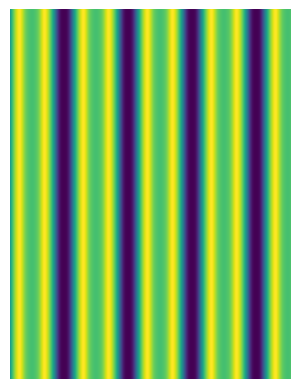

In [69]:
# Fully separated case
offset = 370 * nm
s1 = 300 * nm
s2 = 1000 * nm
l1 = s1 / (s1 + s2)
l2 = s1 / (offset * 2 + s1)
print(l1, l2)
s1, s2 = lambda_to_s(l1, l2, R=offset)
print(s1 / nm, s2 / nm)
system, repeat = plot_line(
    plt.gca(),
    s1=s1,
    s2=s2,
    offset=offset,
    diffusion=50 * nm,
    n_pts=360,
    cmap="viridis",
    lim=(2.8 * um, 8.5 * um, 1.0 * um, 8.5 * um),
)
# fname=f"subfigs-Fig2-FigS5/fitting_l1-{l1:.2f}_l2-{l2:.2f}.tiff"
# system.save_tiff(fname=fname, repeat=repeat)

0.33333333333333337 0.2912621359223301
300.0 599.9999999999999


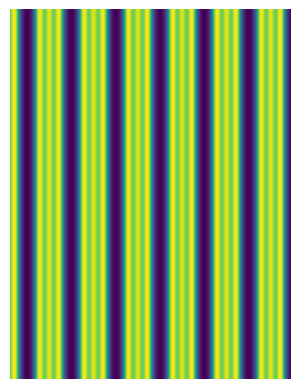

In [74]:
# Sawtooth pattern
offset = 365 * nm
s1 = 300 * nm
s2 = 600 * nm
l1 = s1 / (s1 + s2)
l2 = s1 / (offset * 2 + s1)
print(l1, l2)
s1, s2 = lambda_to_s(l1, l2, R=offset)
print(s1 / nm, s2 / nm)
system = plot_line(
    plt.gca(),
    s1=s1,
    s2=s2,
    offset=offset,
    diffusion=50 * nm,
    n_pts=360,
    cmap="viridis",
    lim=(2.8 * um, 8.5 * um, 1.0 * um, 8.5 * um),
)
# system.save_tiff(fname=f"subfigs-Fig2-FigS5/fitting_l1-{l1:.2f}_l2-{l2:.2f}.tiff")

0.4285714285714286 0.28846153846153844
300.0 399.99999999999994


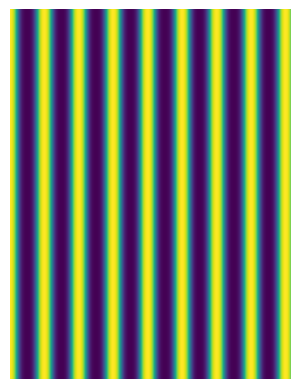

In [75]:
# Comb pattern
offset = 370 * nm
s1 = 300 * nm
s2 = 400 * nm
l1 = s1 / (s1 + s2)
l2 = s1 / (offset * 2 + s1)
print(l1, l2)
s1, s2 = lambda_to_s(l1, l2, R=offset)
print(s1 / nm, s2 / nm)
system = plot_line(
    plt.gca(),
    s1=s1,
    s2=s2,
    offset=offset,
    diffusion=50 * nm,
    n_pts=360,
    cmap="viridis",
    lim=(2.8 * um, 8.5 * um, 1.0 * um, 8.5 * um),
)
# system.save_tiff(h=5 * nm, fname=f"subfigs-Fig2-FigS5/fitting_l1-{l1:.2f}_l2-{l2:.2f}.tiff")

0.5555555555555556 0.1336898395721925
249.99999999999997 199.99999999999997


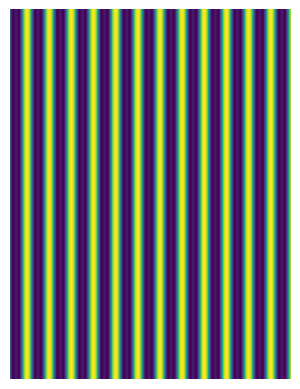

In [83]:
# Higher-order pattern
offset = 810 * nm
s1 = 250 * nm
s2 = 200 * nm
l1 = s1 / (s1 + s2)
l2 = s1 / (offset * 2 + s1)
print(l1, l2)
s1, s2 = lambda_to_s(l1, l2, R=offset)
print(s1 / nm, s2 / nm)
system, repeat = plot_line(
    plt.gca(),
    s1=s1,
    s2=s2,
    offset=offset,
    diffusion=50 * nm,
    n_pts=1200,
    cmap="viridis",
    lim=(2.8 * um, 8.5 * um, 1.0 * um, 8.5 * um),
)
# system.save_tiff(fname=f"subfigs-Fig2-FigS5/fitting_l1-{l1:.2f}_l2-{l2:.2f}-new.tiff",
# repeat=repeat)

##### 2. Below are the CL-simulated sub-panels in Figure S5

981.8181818181816 528.6713286713285


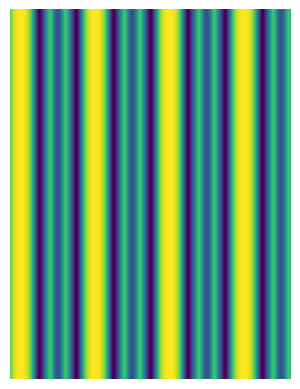

In [84]:
# Sawtooth pattern with larger \lambda_1
offset = 600 * nm
l1 = 0.65
l2 = 0.45
s1, s2 = lambda_to_s(l1, l2, R=offset)
print(s1 / nm, s2 / nm)
system = plot_line(
    plt.gca(),
    s1=s1,
    s2=s2,
    offset=offset,
    diffusion=50 * nm,
    n_pts=360,
    cmap="viridis",
    # angle_offset=90,
    # default_h=5 * nm,
    lim=(2.8 * um, 8.5 * um, 1.0 * um, 8.5 * um),
)
# system.save_tiff(h=5 * nm, fname=f"subfigs-Fig2-FigS5/fitting_l1-{l1:.2f}_l2-{l2:.2f}.tiff")

799.9999999999999 266.6666666666667


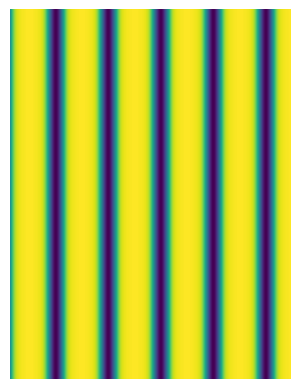

In [85]:
# Comb pattern with larger \lambda_1
offset = 600 * nm
l1 = 0.75
l2 = 0.40
s1, s2 = lambda_to_s(l1, l2, R=offset)
print(s1 / nm, s2 / nm)
system = plot_line(
    plt.gca(),
    s1=s1,
    s2=s2,
    offset=offset,
    diffusion=50 * nm,
    n_pts=360,
    cmap="viridis",
    # angle_offset=90,
    # default_h=5 * nm,
    lim=(2.8 * um, 8.5 * um, 1.0 * um, 8.5 * um),
)
# system.save_tiff(h=5 * nm, fname=f"subfigs-Fig2-FigS5/fitting_l1-{l1:.2f}_l2-{l2:.2f}.tiff")

399.99999999999994 70.58823529411767


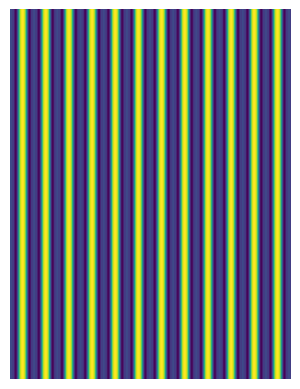

In [87]:
# Higher-order with larger \lambda_1
offset = 600 * nm
l1 = 0.85
l2 = 0.25
s1, s2 = lambda_to_s(l1, l2, R=offset)
print(s1 / nm, s2 / nm)
system = plot_line(
    plt.gca(),
    s1=s1,
    s2=s2,
    offset=offset,
    diffusion=30 * nm,
    n_pts=360,
    cmap="viridis",
    fold_to_bz=True,
    # angle_offset=90,
    # default_h=5 * nm,
    lim=(2.8 * um, 8.5 * um, 1.0 * um, 8.5 * um),
)
# system.save_tiff(h=5 * nm, fname=f"subfigs-Fig2-FigS5/fitting_l1-{l1:.2f}_l2-{l2:.2f}.tiff")

0.010000000000000002 0.05
73.6842105263158 7294.736842105262


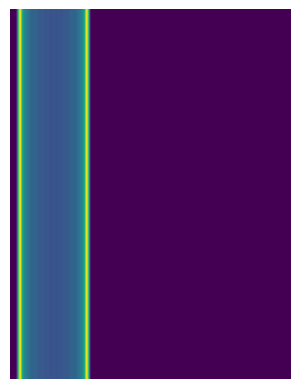

0.05 0.25
466.66666666666674 8866.666666666666


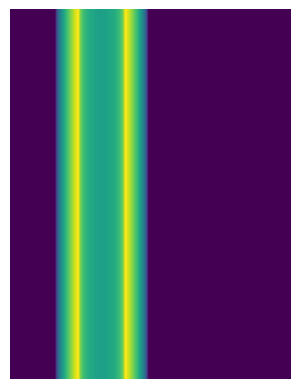

0.1 0.5
1400.0 12600.0


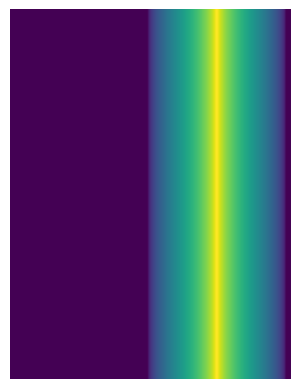

In [88]:
# Approximated lambda_1 --> 0 cases
# The 3D topography were extracted from the distantly-separated periodic line interferences
for l2 in (0.05, 0.25, 0.50):
    offset = 700 * nm
    l2 = l2
    l1 = 0.2 * l2
    print(l1, l2)
    s1, s2 = lambda_to_s(l1, l2, R=offset)
    print(s1 / nm, s2 / nm)
    system = plot_line(
        plt.gca(),
        s1=s1,
        s2=s2,
        offset=offset,
        n_pts=360,
        cmap="viridis",
        h=10 * nm,
        # angle_offset=90,
        # default_h=5 * nm,
        lim=(2.8 * um, 8.5 * um, 1.0 * um, 8.5 * um),
    )
    plt.show()
    # system.save_tiff(h=5 * nm,
    # fname=f"subfigs-Fig2-FigS5/fitting_l1-{l1:.2f}_l2-{l2:.2f}.tiff")